### Esercizio 1
Sia X una variabile casuale di Poisson avente valore atteso E(X) = λ, con λ > 0.

1.1. Si scriva la funzione massa di probabilità f_X(x) = P(X = x).

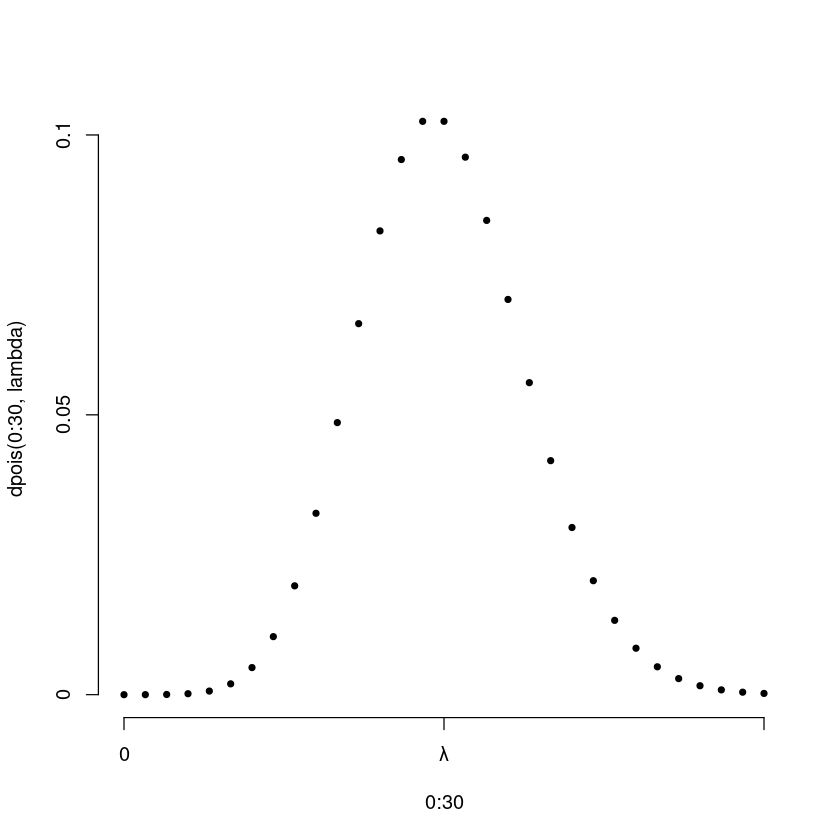

In [2]:
lambda=15
plot(0:30,dpois(0:30,lambda),pch=20,axes=F)
axis(side=1, at=c(0,15,30), labels=c(0,"λ",""))
axis(side=2, at=c(0,0.05,0.1), labels=c(0,0.05,0.1))

1.2. Si esprima la deviazione standard della variabile casuale X come funzione di E(X).  
    sd = sqrt(E(X)) 

1.3. Si supponga, solo in questo punto dell’esercizio, che sia λ = 15. Si traccino i grafici della funzione di ripartizione F_X(x) = P(X ≤ x) e della funzione massa di probabilità f_X(x), indicando con chiarezza le coordinate dei punti “significativi” di tali grafici.

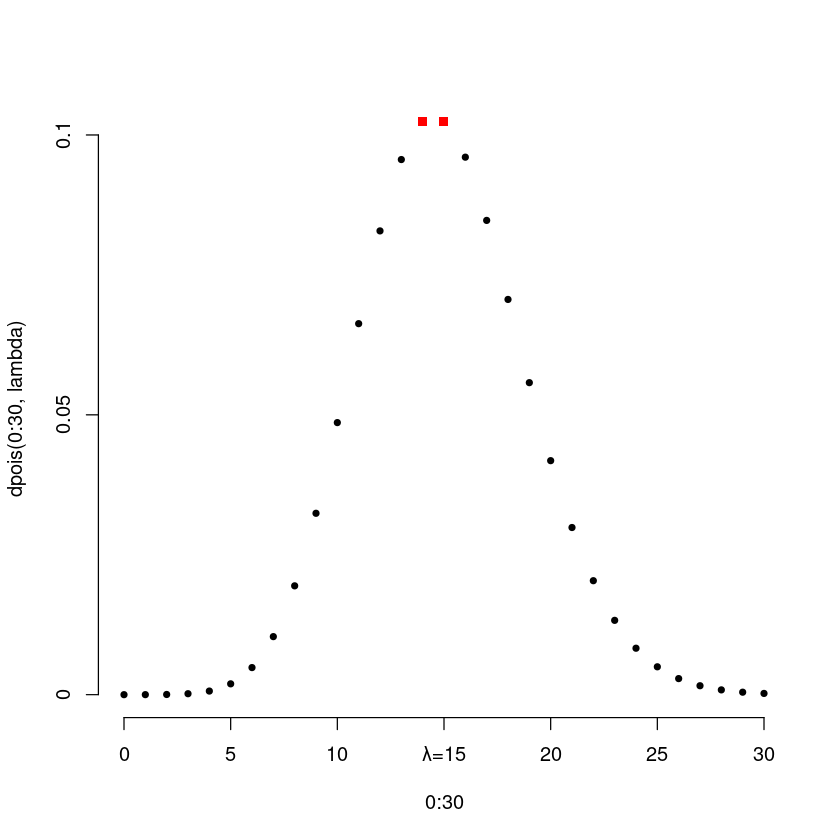

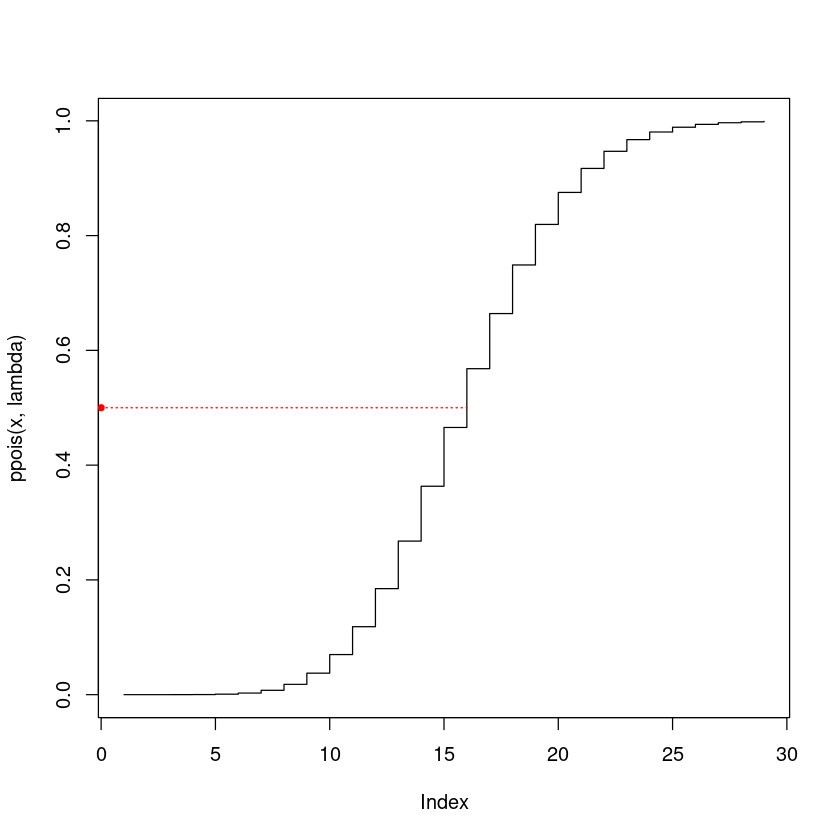

In [107]:
lambda=15

plot(0:30,dpois(0:30,lambda),pch=20,axes=F) # traccia la poissoniana senza gli assi

points(lambda-1,dpois(lambda-1,lambda),pch=15,col="red") # evidenziamo la prima moda
points(lambda  ,dpois(lambda  ,lambda),pch=15,col="red") # evidenziamo le seconda moda

axis(side=1,at=c(0,5,10,15,20,25,30), labels=c("0","5","10","λ=15","20","25","30")) # evidenziamo il valore atteso 
axis(side=2, at=c(0,0.05,0.1), labels=c(0,0.05,0.1))

plot(ppois(x,lambda),type="s") # disegnamo il grafico di ripartizione
mediana=qpois(0.5,lambda)
points(0,0.5,pch=20,col="red") # evidenziamo la mediana
segments(0,0.5,mediana+1,0.5,lty=3,col="red")

### Esercizio 2
il regolamento regionale prevede che l’acqua possa essere definita “potabile” se il numero medio di impurità (cioè di addensamenti di calcare presenti nell’acqua che sembrano granelli di sabbia)riscontrate in 10 litri di acqua è inferiore a una data soglia. Nella piazza del mio comune c’èuna fontanella di acqua potabile. L’amministrazione ha dichiarato che l’acqua della fontanella è potabile perché il tasso medio di impurità che si possono riscontrare in un litro di acqua è 15, tasso che rispetta il regolamento regionale. Ritengo che ci siano le condizioni per poter modellare la variabile X=“numero di impurità presenti in un litro di acqua della fontana” come una variabile di Poisson di parametro λ.

2.1. Quali sono tali condizioni?  
- la probabilità di trovare due o più granelli di sabbia attaccati uno all'altro è da considerarsi nulla
- la probabilità di trovare una impurità in k litri di acqua è proporzionale a k
- il numero di impurità trovate raccogliendo dell'acqua in un contenitore e il numero di impurità trovate raccogliendo dell'acqua in un altro contenitore (..intervalli disgiunti..) costituiscono eventi indipendenti

2.2 Quanto vale λ?
 - lambda=15


2.3. Ho raccolto 1 litro d’acqua in una bottiglia.  Filtrata l’acqua attraverso un colino, ho contato 9 granelli di calcare. Qual è la probabilità di questo evento?

In [3]:
dpois(9,15) 

[1] 0.03240717

2.4. Qual è la probabilità che io riscontrassi meno di 10 impurità?

In [8]:
ppois(10,15)

[1] 0.1184644

2.5. Qual è il numero più probabile di impurità che si riscontrano in un litro di acqua della fontanella?
- lambda = 15

2.6. Determinare una condizione sufficiente sul valore k (cioè il valore massimo di k) tale che P(X ≥ λ+k) ≥ 0.25.
NB: In ACQUA.pdf (per questo problema) c'è un errore nella richiesta dovuto ad un rehash di un'altro problema. In ACQUA.pdf è richiesto di calcolare il valore minimo di k, in realtà dovrebbe essere il valore massimo.

In [10]:
#si tratta quindi di deteminare il quantile 0.75
aa=qpois(0.75,lambda)  
k=aa-lambda

#in alternativa: 
aa=qpois(0.25,lambda,lower.tail=FALSE) 
k=aa-lambda

print(k)

[1] 3


2.7. Controllate che P(λ−k < X ≤ λ+k) ≈ 0.5.

In [11]:
ppois(lambda+k,lambda)-ppois(lambda-k,lambda)

[1] 0.5518607

## Esercizio 3
Consideriamo ora la variabile poissoniana X(t) = “numero di impurità presenti in t litri di acqua della fontana”.

3.1. Specificate il parametro λ in funzione di t.
 - λ = 15 * t  

3.2. In media, quanti granelli di calcare si trovano in mezzo litro di acqua?

In [127]:
v = 15
t = 0.5
lambda = t*v
print(lambda)

[1] 7.5


3.3. Qual'è la probabilità che, riempita la mia borraccia con 50cl di acqua della fontanella, io beva, insieme all’acqua, più di 10 granelli di calcare?

In [12]:
ppois(10,lambda,lower.tail=F)

[1] 0.8815356

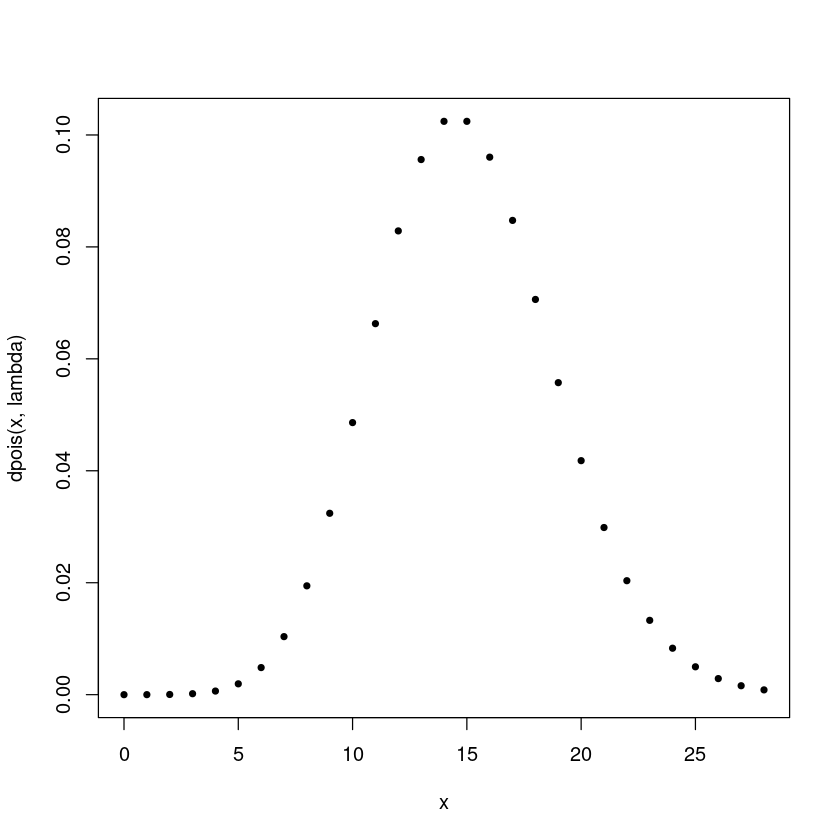

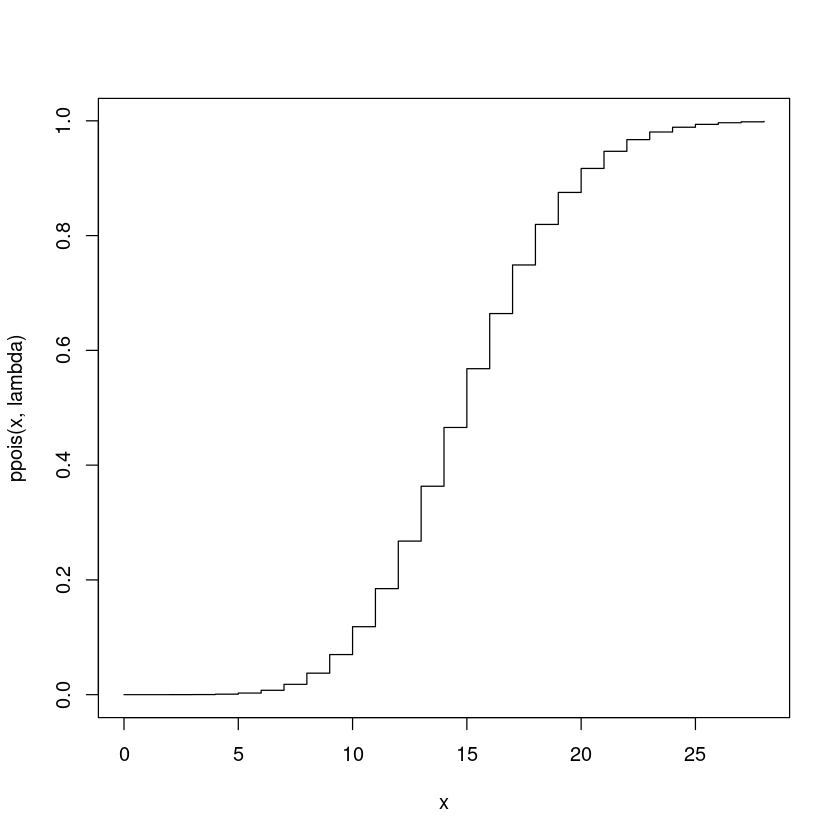

In [14]:
xinfinito=qpois(0.999,lambda)
x=seq(0,xinfinito)
plot(x,dpois(x,lambda),pch=20)
plot(x,ppois(x,lambda),type="s")

## Esercizio 4
Sia Y= “litri di acqua che scorrono dalla fontanella tra un granello di calcare e il successivo”.

4.1. Quale modello probabilistico scegliete per modellare Y?. Specificarne il parametro.
- Una esponenziale di parametro lambda uguale alla vecchia poissoniana, ovvero 15.

4.2. Tracciate il grafico della densità di probabilità f_Y(y), e su tale grafico evidenziate la probabilità che tra un granello di calcare e l’altro scorra più di un bicchiere di acqua (0.2 litri).

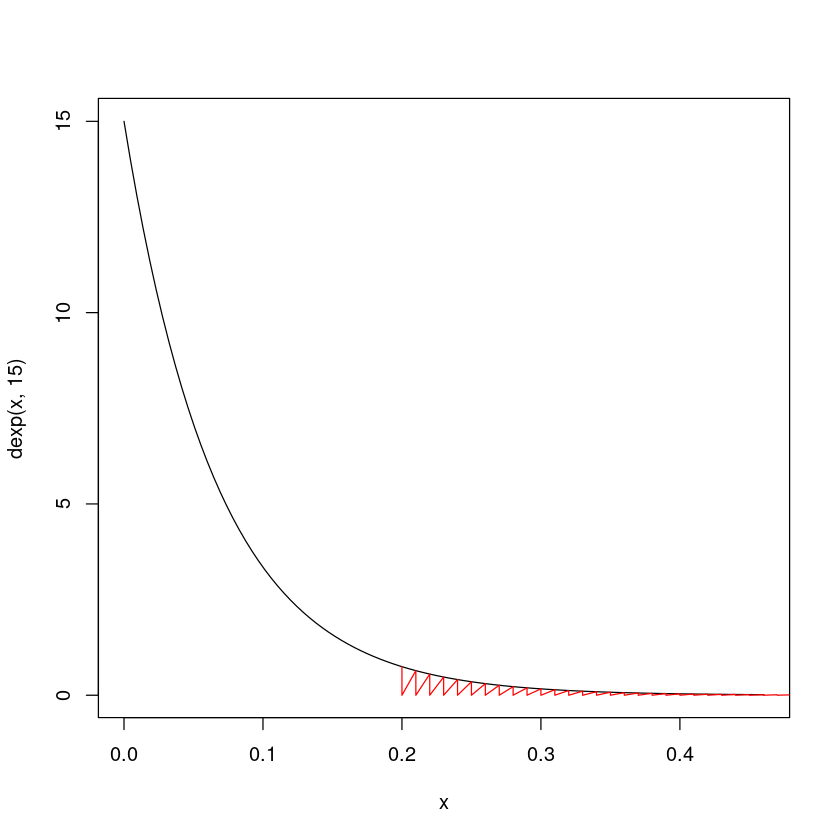

In [168]:
ll=0.2
xinfinito=qexp(0.999,v)
curve(dexp(x,15),xlim=c(0,xinfinito))

cx = c()
cy = c()
for (i in 0:30){
    cx = c(cx, 0.2+i/100,0.2+i/100)
    cy = c(cy, dexp(0.2+i/100,15),0)
}
lines(cx,cy,col="red")

4.3. Tracciate il grafico della funzione di ripartizione F_Y(y) = P(Y≤y), e su tale grafico evidenziate la probabilità che tra un granello di calcare e l’altro scorra meno di un bicchieredi acqua (0.2 litri).

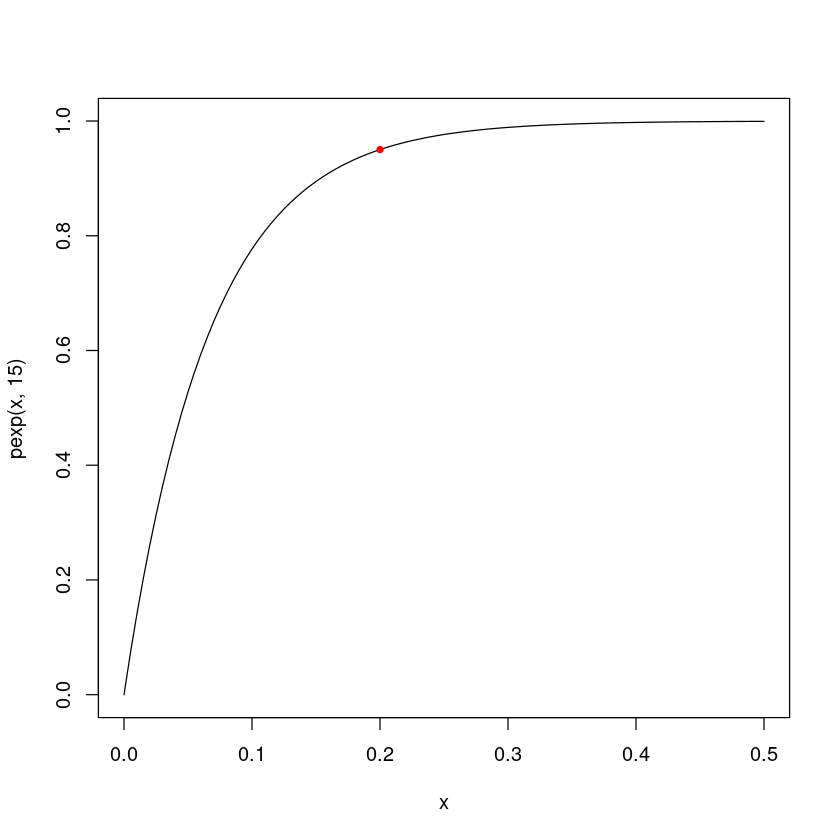

In [29]:
curve(pexp(x,15),xlim=c(0,0.5))
points(0.2,pexp(0.2,15),col="red",pch=20)

4.4. Calcolate la probabilità che nella borraccia non ci siano impurità, cioè che si debba prelevare dalla fontana più di mezzo litro di acqua prima di incontrare la prima impurità.

In [17]:
1-pexp(0.5,15)
pexp(0.5,15, lower.tail=F)

[1] 0.0005530844

[1] 0.0005530844

5. Ho versato l’acqua della borraccia in un bicchiere di capienza 20 cl e non ho trovato impurità, qual è la probabilità che nella borraccia non ci siano impurità?
 - P(X > 0.3+0.2 | X > 0.2) = P(X>0.3) 

In [19]:
1-pexp(0.3,15) # per mancanza di memoria dell'esponenziale

[1] 0.011109